## Import Libraries

In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import time 
import requests

## Data Extraction of Targets using JSON queries

#### 3. CHEMBL2041

In [69]:
targets = ['CHEMBL2041'] 
targets = ",".join(targets) 
assay_type = 'B' 
limit = 100 

In [70]:
url_stem = "https://www.ebi.ac.uk"
url_full_string = url_stem + "/chembl/api/data/activity.json?target_chembl_id__in={}&limit={}".format(targets, assay_type, limit)
url_full = requests.get(url_full_string).json() 
url_activities = url_full['activities'] 

In [71]:
while url_full['page_meta']['next']:
    url_full = requests.get(url_stem + url_full['page_meta']['next']).json()
    url_activities = url_activities + url_full['activities']

In [72]:
df = pd.DataFrame(url_activities)

In [73]:
print("This is the url string that calls the 'Activities' API with the initial query specification:\n{}".format(url_full_string) )
print("\nThese are the available columns for the Activities API:\n{}".format(df.columns))

This is the url string that calls the 'Activities' API with the initial query specification:
https://www.ebi.ac.uk/chembl/api/data/activity.json?target_chembl_id__in=CHEMBL2041&limit=B

These are the available columns for the Activities API:
Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_i

In [74]:
cmpd_chembl_ids = list(set(df['molecule_chembl_id']))
print("There are {} compounds initially identified as active on the known targets. e.g.".format(len(cmpd_chembl_ids)))
print(cmpd_chembl_ids[0:2])

There are 2458 compounds initially identified as active on the known targets. e.g.
['CHEMBL1169812', 'CHEMBL4066664']


In [75]:
cmpd_chembl_ids = ",".join(cmpd_chembl_ids[0:]) 
limit = 100

In [76]:
print(df.shape)

(5504, 43)


B    4764
F     740
Name: assay_type, dtype: int64


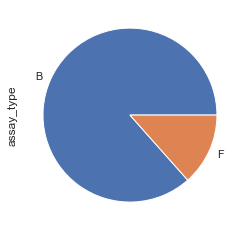

In [77]:
print(df['assay_type'].value_counts())
df['assay_type'].value_counts().plot(kind='pie')

In [78]:
#df.dtypes

In [79]:
#Keeping only the relevant variables

df2041 = df[['standard_type', 'standard_relation', 'standard_value', 'standard_units', 'assay_type', 'pchembl_value']]
df2041

,standard_type,standard_relation,standard_value,standard_units,assay_type,pchembl_value
0,IC50,>,10000.0,nM,B,None
1,IC50,>,40000.0,nM,B,None
2,IC50,=,31.0,nM,B,7.51
3,IC50,=,8300.0,nM,B,5.08
4,IC50,=,1900.0,nM,B,5.72
...,...,...,...,...,...,...
5499,Inhibition,None,None,None,B,None
5500,Inhibition,=,28.7,%,B,None
5501,Inhibition,=,97.0,%,B,None
5502,Inhibition,=,68.0,%,B,None


In [80]:

# def explore_variable(col_name):
    
#     print(f"Unique values in df2041: {df2041[col_name].unique()}")
    
#     print(f"Number of unique values in df2041 : {df2041[col_name].nunique()}") 
 

In [81]:
# explore_variable('standard_type')

In [82]:
type(df2041)

pandas.core.frame.DataFrame

In [83]:
df2041 = df2041.loc[df['standard_type'].isin(["IC50","Ki","Kd"])]

In [84]:
df2041

,standard_type,standard_relation,standard_value,standard_units,assay_type,pchembl_value
0,IC50,>,10000.0,nM,B,None
1,IC50,>,40000.0,nM,B,None
2,IC50,=,31.0,nM,B,7.51
3,IC50,=,8300.0,nM,B,5.08
4,IC50,=,1900.0,nM,B,5.72
...,...,...,...,...,...,...
5463,Ki,>,2000.0,nM,B,None
5464,Ki,>,2000.0,nM,B,None
5465,Ki,None,None,None,B,None
5473,IC50,=,66.0,nM,B,7.18


In [85]:
def explore_variable(col_name):
    
    print(f"Unique values in df2041: {df[col_name].unique()}")
    
    print(f"Number of unique values in df2041 : {df[col_name].nunique()}") 
 

In [86]:
explore_variable('standard_type')

Unique values in df2041: ['IC50' 'Ki' 'Activity' 'Inhibition' 'EC50' 'Kd' 'Residual activity'
 'Inihibition' 'Residual Activity' 'GI50' 'Ratio IC50' 'Kd apparent']
Number of unique values in df2041 : 12


In [87]:
explore_variable('assay_type')

Unique values in df2041: ['B' 'F']
Number of unique values in df2041 : 2


In [88]:
explore_variable('standard_units')

Unique values in df2041: ['nM' 'cpm' '%' None]
Number of unique values in df2041 : 3


In [89]:
# Percentage of missing values per column

np.round(df2041.isna().mean()*100,2)

standard_type         0.00
standard_relation     0.47
standard_value        0.47
standard_units        0.47
assay_type            0.00
pchembl_value        37.21
dtype: float64

In [90]:
#print(df2041.pchembl_value)

In [91]:
df2041.pchembl_value = df2041.pchembl_value.astype(float)

C:\Users\Kashika\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Data Visualization

#### 1. CHEMBL2041

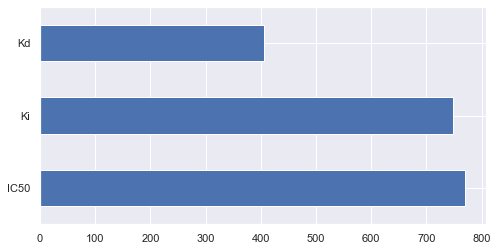

In [92]:
df2041.standard_type.value_counts().plot(kind='barh')

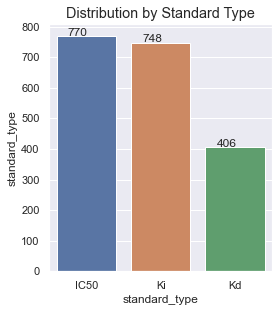

In [93]:
def count_plot(col_name, fig_size=(10,10)):
   
    fig = plt.figure(figsize=fig_size)
    fig.add_subplot(2,1,1)            
    ax1 = sns.countplot(x=col_name, data=df2041, order = df2041[col_name].value_counts().index)
    for p in ax1.patches:
        ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    ax1.set_title("Distribution by Standard Type", fontsize='large')
    ax1.set_ylabel(col_name)           
    
    plt.show() 
    
count_plot(col_name ='standard_type', fig_size=(4,10))

In [94]:
df2041.standard_type.value_counts()

IC50    770
Ki      748
Kd      406
Name: standard_type, dtype: int64

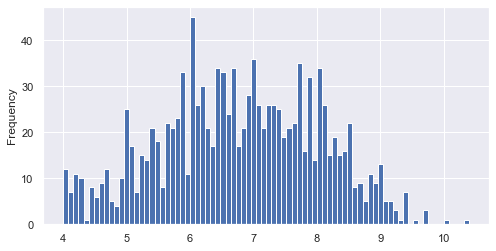

In [95]:
df2041['pchembl_value'].plot(kind = 'hist', bins = 80)

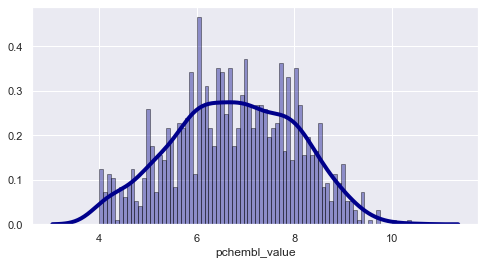

In [104]:
sns.distplot(df2041['pchembl_value'], hist=True, kde=True, 
             bins=80, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

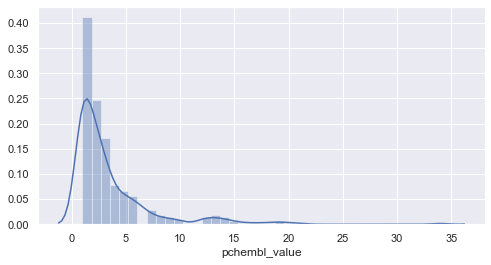

In [97]:
#sns.set(style="darkgrid",palette='Set1')

sns.set(rc={"figure.figsize": (8,4)})                                                                                                                                                                                                                                                                                                                                                                                                                                                             

ax = sns.distplot(df2041['pchembl_value'].value_counts())
plt.show()


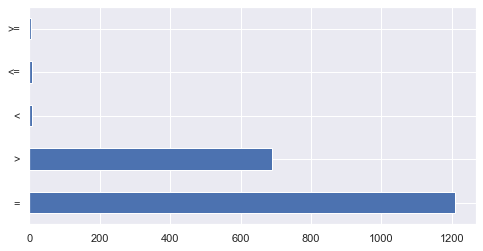

In [98]:
df2041.standard_relation.value_counts().plot(kind='barh')

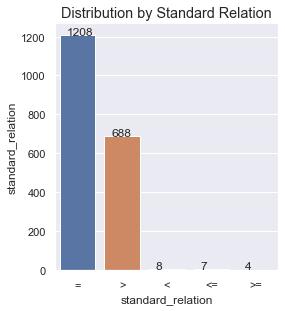

In [66]:
def count_plot(col_name, fig_size=(10,10)):
   
    fig = plt.figure(figsize=fig_size)
    fig.add_subplot(2,1,1)            
    ax1 = sns.countplot(x=col_name, data=df2041, order = df2041[col_name].value_counts().index)
    for p in ax1.patches:
        ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    ax1.set_title("Distribution by Standard Relation", fontsize='large')
    ax1.set_ylabel(col_name)           
    
    plt.show() 
    
count_plot(col_name ='standard_relation', fig_size=(4,10))

B    1184
F     740
Name: assay_type, dtype: int64


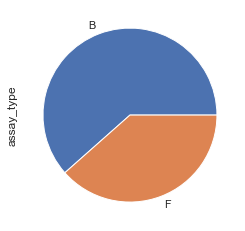

In [39]:
print(df2041['assay_type'].value_counts())
df2041['assay_type'].value_counts().plot(kind='pie')

In [40]:
#### add code for kurtosis, describe functions, add IQR results for each chembl ID
#### split by Chembl IDs as given above

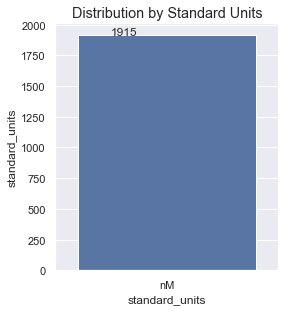

In [41]:
def count_plot(col_name, fig_size=(10,10)):
   
    fig = plt.figure(figsize=fig_size)
    fig.add_subplot(2,1,1)            
    ax1 = sns.countplot(x=col_name, data=df2041, order = df2041[col_name].value_counts().index)
    for p in ax1.patches:
        ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    ax1.set_title("Distribution by Standard Units", fontsize='large')
    ax1.set_ylabel(col_name)           
    
    plt.show() 
    
count_plot(col_name ='standard_units', fig_size=(4,10))

In [42]:
!pip install pandas_profiling


In [43]:

import pandas_profiling

df2041.profile_report(title="ChEMBL 2041 Report")


# Conclusion:
#### Statistics summary of pChEMBL Value shows the value of Std deviation as 1.25, Kurtosis as –0.60, Mean as 6.7 and Skewness as –0.082
#### Skewness as –0.082 indicates that the data is highly skewed.
#### Kurtosis as –0.599 indicates negative Kurtosis and shows that the data has more weight in the tails.